<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/k_Means_Clustering(UnsupervisedML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-income-age-group.csv'
df = pd.read_csv(url)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
# droping Name column because we can't scelized categorical values.
df1 = df.drop('Name', axis=1)
df1.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [4]:
# scaling the dataframe using MiMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
scaled = pd.DataFrame(scaler.transform(df1), columns=df1.columns)
scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


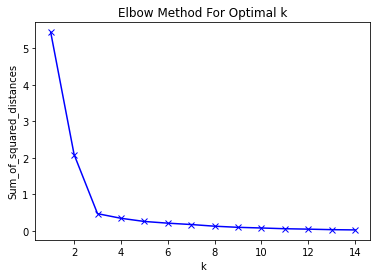

In [11]:
# let's find out the right value of k(cluster) using ebow method

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

analyzing the figure, we can take k=3

In [12]:
# let's divide out dataset into 3 cluster using cllustering algorithm hence we decide k=3

clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


If we want, we can view the dataset by placing the cluster number with all the rows of the dataset.

In [13]:
df['cluster'] = labels
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Now we will see the average value of each cluster. Through this we can easily understand the data characteristics of any cluster.

In [15]:
df.groupby('cluster').mean()

,Age,Income($)
cluster,,
0,38.285714,150000.000000
1,28.333333,58611.111111
2,40.500000,68666.666667


In [22]:
# let's see number of datapoints in each cluster

df['cluster'].value_counts()

1    9
0    7
2    6
Name: cluster, dtype: int64

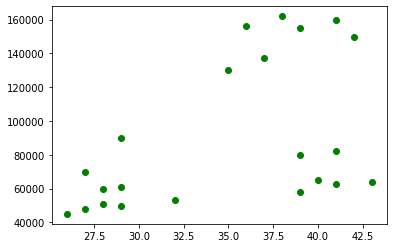

In [30]:
# visualize the clusters into scatterplot
plt.scatter(df['Age'], df['Income($)'], color='g')

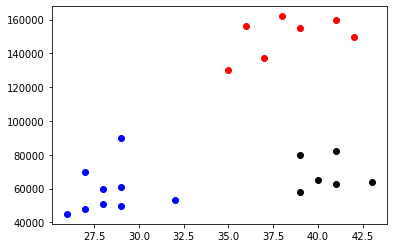

In [46]:
a = df[df['cluster']==0]
b = df[df['cluster']==1]
c = df[df['cluster']==2]
plt.scatter(a.Age, a['Income($)'], color='red')
plt.scatter(b.Age, b['Income($)'], color='blue')
plt.scatter(c.Age, c['Income($)'], color='black')


In [47]:
print(a)

        Name  Age  Income($)  cluster
4       Kory   42     150000        0
5     Gautam   39     155000        0
6      David   41     160000        0
7     Andrea   38     162000        0
8       Brad   36     156000        0
9   Angelina   35     130000        0
10    Donald   37     137000        0


In [48]:
print(b)

       Name  Age  Income($)  cluster
0       Rob   27      70000        1
1   Michael   29      90000        1
2     Mohan   29      61000        1
3    Ismail   28      60000        1
11      Tom   26      45000        1
12   Arnold   27      48000        1
13    Jared   28      51000        1
14    Stark   29      49500        1
15   Ranbir   32      53000        1


In [49]:
print(c)

        Name  Age  Income($)  cluster
16    Dipika   40      65000        2
17  Priyanka   41      63000        2
18      Nick   43      64000        2
19      Alia   39      80000        2
20       Sid   41      82000        2
21     Abdul   39      58000        2
